In [17]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
import statsmodels  as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from typing import Literal
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as multi
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# 1.Affect of treatments on soil chemical properties (e.g. soil Al, B, K, P, Cl, BS, etc.) at sampling time (2019 Rockford)? 

# 2. Individual ANOVA TEST

# Question

**1.Affect of Treatment on Combine Soil chemical Properties?**

**2.Affect of Depth on Combine Soil chemical Properties?**

**3.Affect of Interaction of Treatment and  Depth on Combine Soil chemical Properties?**

*There was missing value in Cl dataset.So, Average value 2.6 was provided.*

In [35]:
df=pd.read_excel('soil.xlsx')
pd.set_option('display.max_columns',None)

In [36]:
df1=df.filter(['Rep','Trt','Depth','Cl','B','Zn','Mn','Cu','Fe','Na','K','Ca','Mg','Total Bases'])
df

,Rep,Trt,Depth,Lab ID,Can #,Price,Begin Depth,End Depth,Available Moisture,Bulk Density,Bulk Density.1,Ec(1:1),OM,NH4N,NO3N,BrayP1,OlsenP,OlsenK,SO4S,Cl,B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg,Total Bases,Base Saturation,Efferves.,pH(1:1),A & E Buffer pH,Lime Req (to pH 6.5),Al (KCl),Al (DTPA),Est. CEC,CEC,Ca/CEC,Mg/CEC,Na/CEC,K/CEC
0,1,1,0-3,629714,81,30,0,3,0.15,1.294118,0.88,0.40,2.35,87.2,67.9,117,78.0,183,10,2.6,0.13,1.03,98.1,1.0,87,0.06,0.47,3.7,0.8,5.0,50.505051,0,4.42,7.14,2302.716220,107,19,9.1,9.9,37.373737,8.080808,0.606061,4.747475
1,1,1,3-6,629715,82,30,3,6,0.29,1.294118,0.88,0.35,2.11,39.2,53.0,91,67.0,161,17,4.3,0.08,0.64,55.1,0.9,82,0.06,0.41,3.1,0.8,4.4,51.162791,0,4.14,7.07,2558.293290,182,28,8.6,NaN,36.046512,9.302326,0.697674,4.767442
2,1,1,6-12,629716,83,30,6,12,0.58,1.279412,1.74,0.19,1.21,2.0,14.7,38,30.0,125,8,1.1,0.08,0.41,23.5,1.0,55,0.08,0.32,6.1,1.6,8.1,65.322581,0,4.85,7.35,3182.749375,60,9,12.4,NaN,49.193548,12.903226,0.645161,2.580645
3,1,2,0-3,629717,84,30,0,3,0.25,1.294118,0.88,0.56,2.33,9.7,94.6,115,69.0,191,18,3.0,0.24,0.82,55.9,1.2,79,0.08,0.49,7.5,0.9,9.0,68.702290,0,5.11,7.29,1591.107692,17,13,13.1,NaN,57.251908,6.870229,0.610687,3.740458
4,1,2,3-6,629718,85,30,3,6,0.24,1.294118,0.88,0.35,2.29,23.4,48.5,105,71.0,180,14,2.3,0.08,0.67,65.3,0.8,86,0.04,0.46,3.1,0.8,4.4,51.162791,0,4.16,7.05,2610.227600,165,29,8.6,NaN,36.046512,9.302326,0.465116,5.348837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,4,8,3-6,629817,184,30,3,6,0.22,1.264706,0.86,0.35,2.24,16.3,42.2,107,60.0,176,15,2.9,0.08,0.56,47.6,0.9,78,0.05,0.45,3.4,0.8,4.7,51.648352,0,4.05,7.14,2375.035125,180,26,9.1,NaN,37.362637,8.791209,0.549451,4.945055
104,4,8,6-12,629818,185,30,6,12,0.47,1.220588,1.66,0.16,1.27,1.0,10.5,86,45.0,142,11,0.8,0.11,0.53,37.9,1.1,60,0.07,0.36,5.9,1.6,7.9,63.200000,0,4.62,7.34,3416.842440,79,13,12.5,NaN,47.200000,12.800000,0.560000,2.880000
105,4,9,0-3,629819,186,30,0,3,0.18,1.264706,0.86,1.05,2.77,150.8,113.1,138,84.0,262,52,10.4,0.13,1.13,68.0,1.2,73,0.08,0.67,8.7,0.8,10.2,76.691729,0,5.90,7.52,621.084000,2,6,13.3,NaN,65.413534,6.015038,0.601504,5.037594
106,4,9,3-6,629820,187,30,3,6,0.17,1.264706,0.86,0.37,2.29,10.1,41.1,109,63.0,212,26,8.6,0.11,0.93,81.1,1.2,98,0.06,0.54,3.7,0.7,5.0,53.191489,0,4.14,7.13,2393.242110,161,32,9.4,NaN,39.361702,7.446809,0.638298,5.744681


# Data Visualization

**1.Scatter plot**

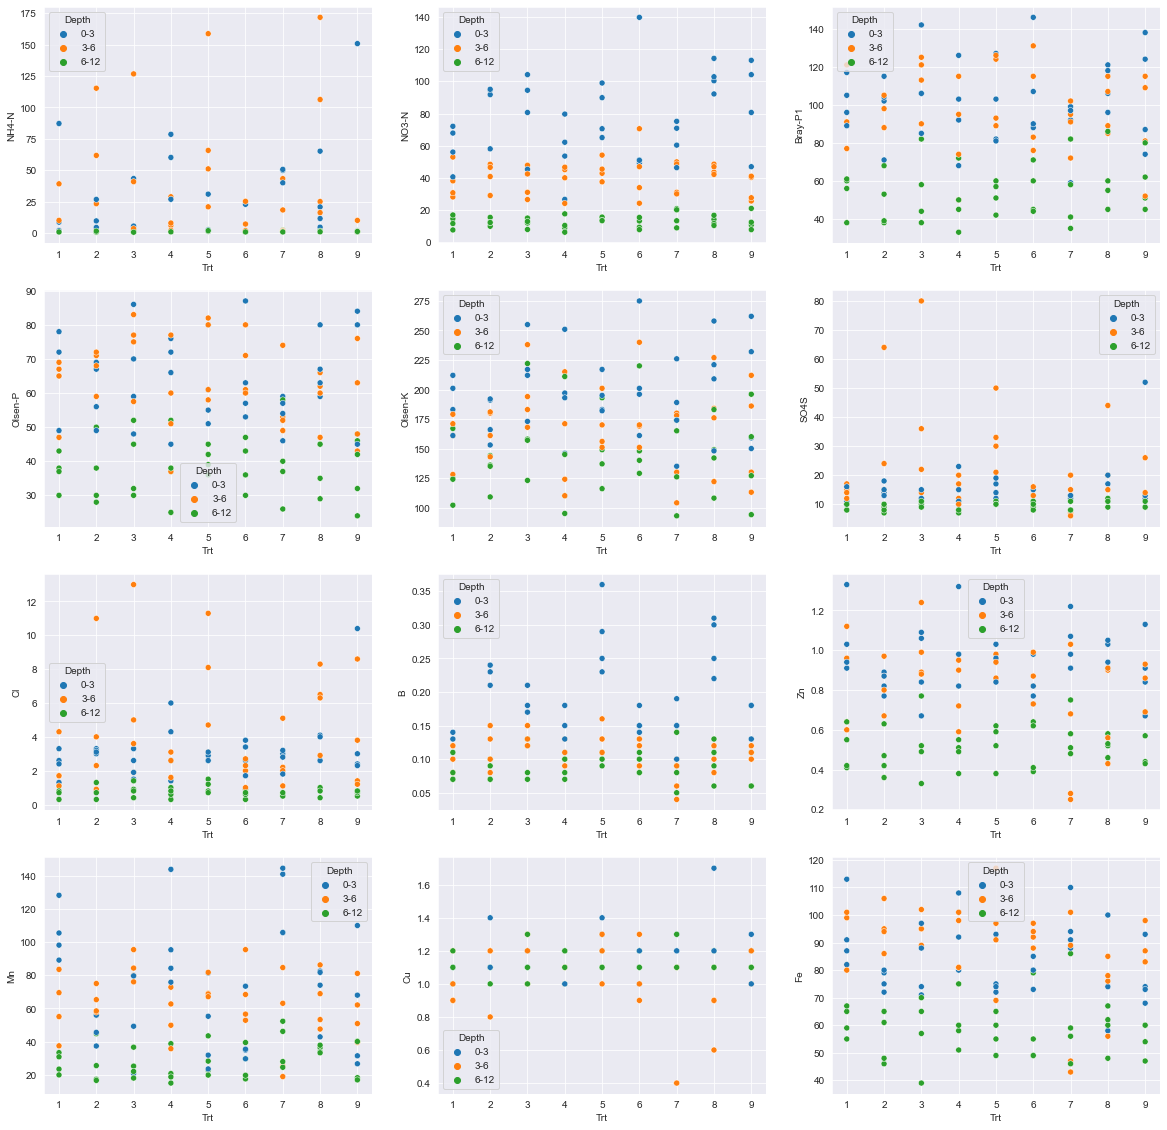

In [22]:
 sns.set_palette('tab10')  
f , axes = plt.subplots(nrows=4, ncols=3, figsize = (20,20))
sns.set_style("darkgrid")
f1=sns.scatterplot(x='Trt',y='NH4-N',hue='Depth',data=df, ax=axes[0,0])
f2=sns.scatterplot(x='Trt',y='NO3-N',hue='Depth',data=df,ax=axes[0,1])
f3=sns.scatterplot(x='Trt',y='Bray-P1',hue='Depth',data=df,ax=axes[0,2])
f4=sns.scatterplot(x='Trt',y='Olsen-P',hue='Depth',data=df,ax=axes[1,0])
f5=sns.scatterplot(x='Trt',y='Olsen-K',hue='Depth',data=df, ax=axes[1,1])
f6=sns.scatterplot(x='Trt',y='SO4S',hue='Depth',data=df,ax=axes[1,2])
f7=sns.scatterplot(x='Trt',y='Cl',hue='Depth',data=df,ax=axes[2,0])
f8=sns.scatterplot(x='Trt',y='B',hue='Depth',data=df,ax=axes[2,1])
f9=sns.scatterplot(x='Trt',y='Zn',hue='Depth',data=df,ax=axes[2,2])
f7=sns.scatterplot(x='Trt',y='Mn',hue='Depth',data=df,ax=axes[3,0])
f8=sns.scatterplot(x='Trt',y='Cu',hue='Depth',data=df,ax=axes[3,1])
f9=sns.scatterplot(x='Trt',y='Fe',hue='Depth',data=df,ax=axes[3,2])
plt.show()

Figure: How our data points are distributed.

**Box Plot**

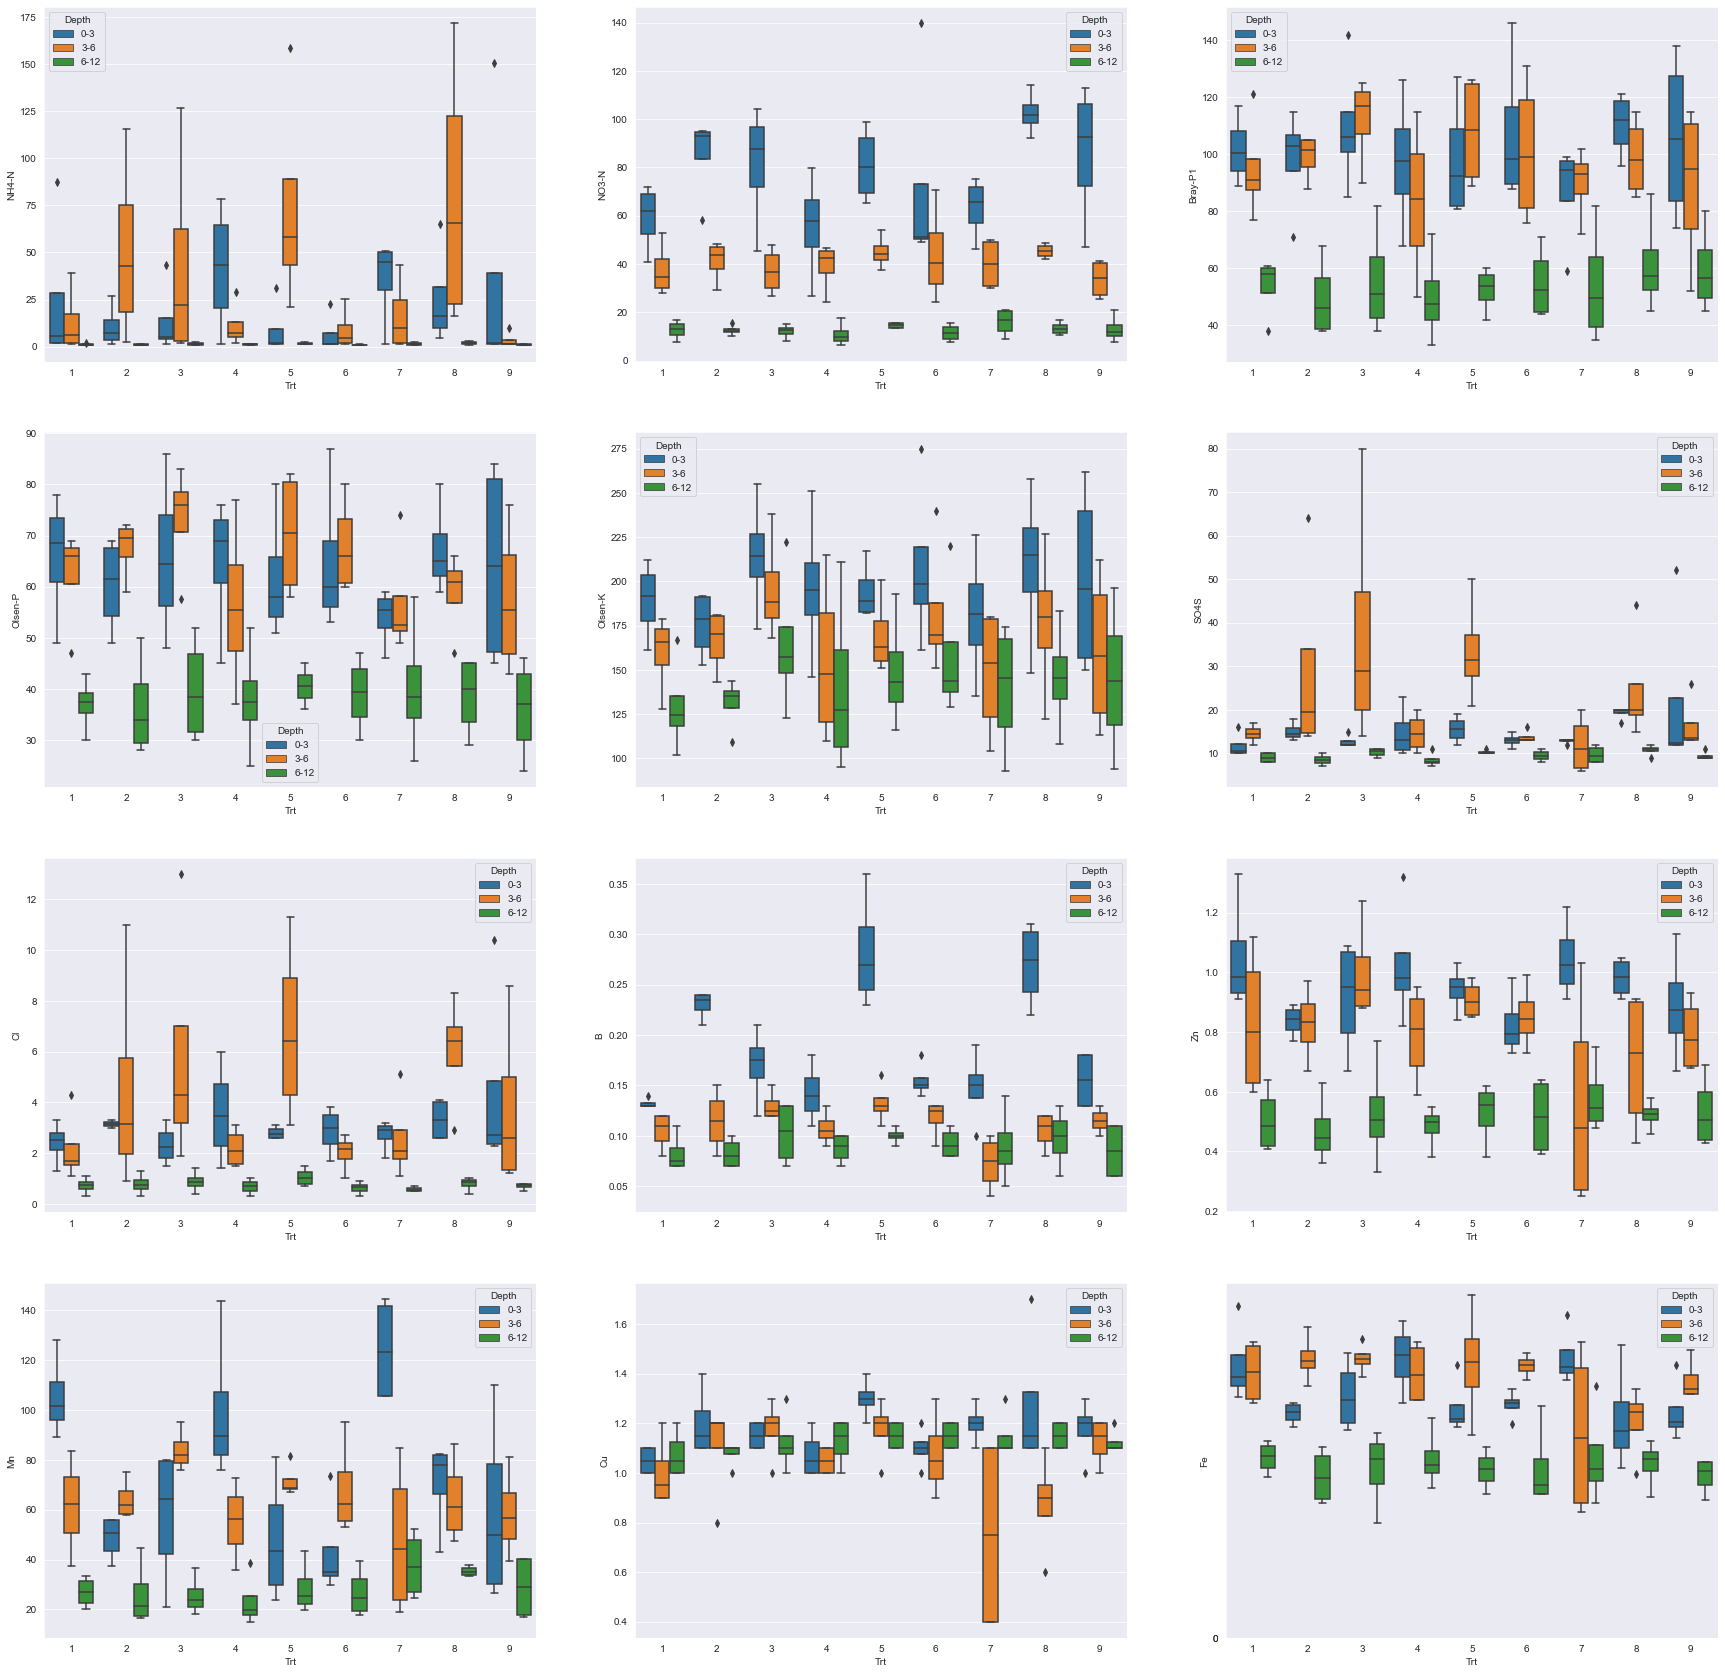

In [23]:
 sns.set_palette('tab10')  
f , axes = plt.subplots(nrows=4, ncols=3, figsize = (30,30))
sns.set_style("darkgrid")
 f1=sns.boxplot(x='Trt',y='NH4-N',hue='Depth',data=df, ax=axes[0,0])
f2=sns.boxplot(x='Trt',y='NO3-N',hue='Depth',data=df,ax=axes[0,1])
f3=sns.boxplot(x='Trt',y='Bray-P1',hue='Depth',data=df,ax=axes[0,2])
f4=sns.boxplot(x='Trt',y='Olsen-P',hue='Depth',data=df,ax=axes[1,0])
f5=sns.boxplot(x='Trt',y='Olsen-K',hue='Depth',data=df, ax=axes[1,1])
f6=sns.boxplot(x='Trt',y='SO4S',hue='Depth',data=df,ax=axes[1,2])
f7=sns.boxplot(x='Trt',y='Cl',hue='Depth',data=df,ax=axes[2,0])
f8=sns.boxplot(x='Trt',y='B',hue='Depth',data=df,ax=axes[2,1])
f9=sns.boxplot(x='Trt',y='Zn',hue='Depth',data=df,ax=axes[2,2])
f7=sns.boxplot(x='Trt',y='Mn',hue='Depth',data=df,ax=axes[3,0])
f8=sns.boxplot(x='Trt',y='Cu',hue='Depth',data=df,ax=axes[3,1])
f9=sns.boxplot(x='Trt',y='Fe',hue='Depth',data=df,ax=axes[3,2])
plt.yticks([0,0])
plt.show()

In [39]:
 maov = MANOVA.from_formula('NH4N+NO3N+BrayP1+OlsenP+OlsenK+SO4S+Cl+B+Zn+Mn+Cu+Fe~Depth + Trt + Trt:Depth',data = df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value   Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.1044 12.0000 91.0000 65.0550 0.0000
          Pillai's trace 0.8956 12.0000 91.0000 65.0550 0.0000
  Hotelling-Lawley trace 8.5787 12.0000 91.0000 65.0550 0.0000
     Roy's greatest root 8.5787 12.0000 91.0000 65.0550 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Depth          Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2838 24.0000 182.0000  6.6522 0.0000
         Pillai's trace 0.9138 24.0000 184.0000  6.4500 0.0000
 Hotelling-

## Answer From MANOVA Table

**1.Affect of Treatment on Combine Soil chemical Properties?**

1.Null Hypothesis:There is no difference in group means vector at any level of the Treatment variable. 

(μ11=μ12=μ13=μ14=μ15=μ16=μ17=μ18=μ19)

(μ21=μ22=μ23=μ24=μ25=μ26=μ27=μ28=μ29)

(.   =  . =  . =  . =  . =  . =  . =  . =  . )

(.  = . = . = . = . = . = . = . = . )

(μFe1=μFe2=μFe3=μfe4=μfe5=μfe6=μfe7=μfe8=μfe9)
 
2. Alternative Hypothesis: There is at least one difference in group means at any level of treatment. 

(μ11∉μ12∉μ13∉μ14∉μ15∉μ16∉μ17∉μ18∉μ19)

(μ21∉μ22∉μ23∉μ24∉μ25∉μ26∉μ27∉μ28∉μ29)

(.  ∉ . ∉ . ∉ . ∉ . ∉ . ∉. ∉ . ∉ . )

(.  ∉ . ∉ . ∉ . ∉ . ∉ . ∉ . ∉ . ∉ . )

(μ91∉μ92∉μ93∉μ94∉μ95∉μ96∉μ97∉μ98∉μ99)

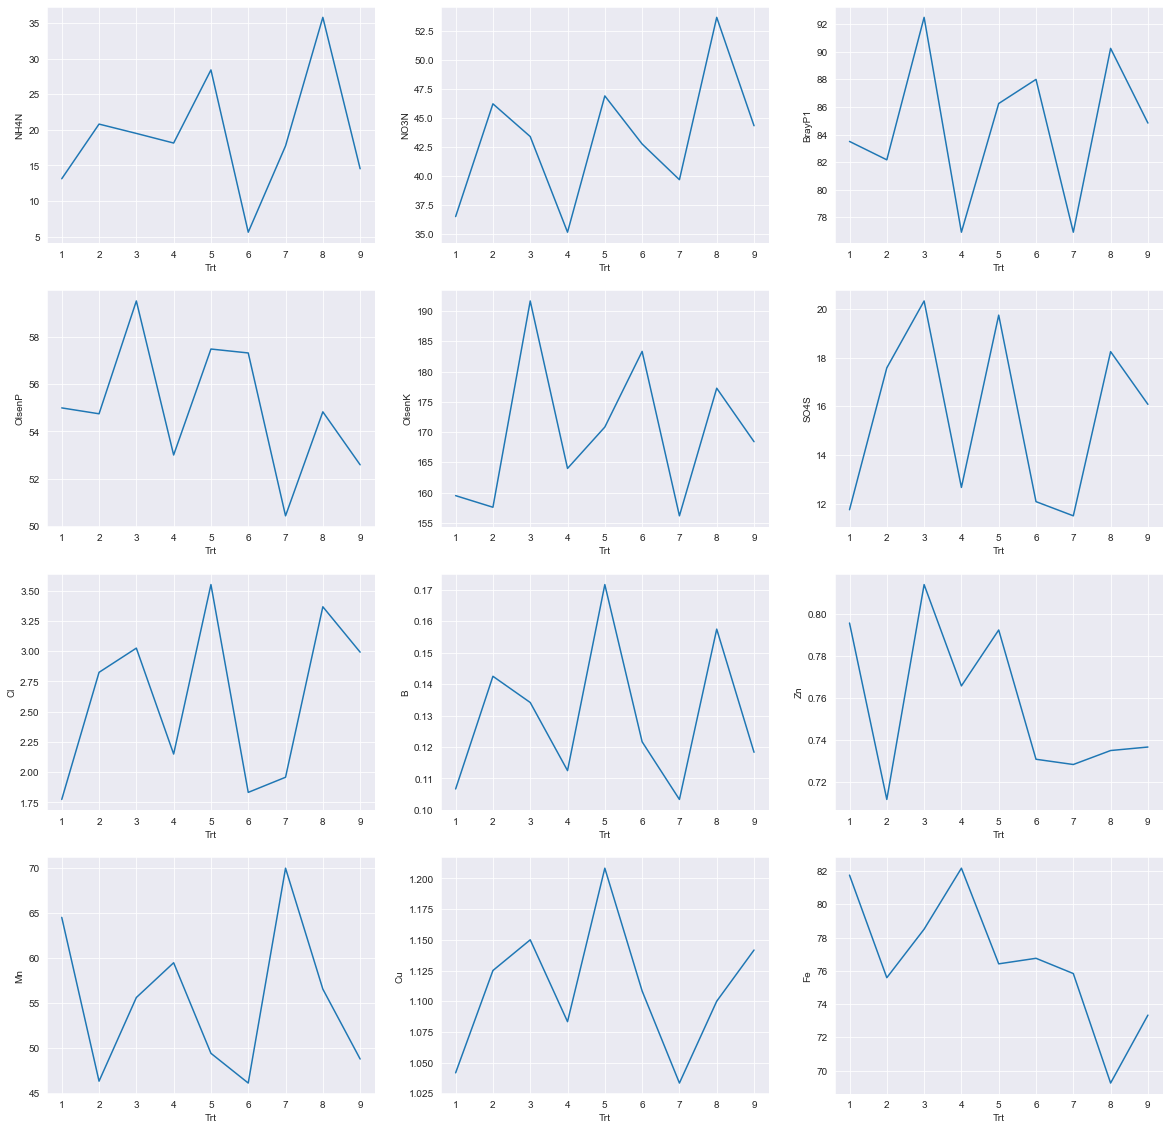

In [50]:
f , axes = plt.subplots(nrows=4, ncols=3, figsize = (20,20))
f1=sns.lineplot(x='Trt',y='NH4N',data=df, ax=axes[0,0],ci=None)
f2=sns.lineplot(x='Trt',y='NO3N',data=df,ax=axes[0,1],ci=None)
f3=sns.lineplot(x='Trt',y='BrayP1',data=df,ax=axes[0,2],ci=None)
f4=sns.lineplot(x='Trt',y='OlsenP', data=df,ax=axes[1,0],ci=None)
f5=sns.lineplot(x='Trt',y='OlsenK',data=df, ax=axes[1,1],ci=None)
f6=sns.lineplot(x='Trt',y='SO4S',data=df,ax=axes[1,2],ci=None)
f7=sns.lineplot(x='Trt',y='Cl',data=df,ax=axes[2,0],ci=None)
f8=sns.lineplot(x='Trt',y='B',data=df,ax=axes[2,1],ci=None)
f9=sns.lineplot(x='Trt',y='Zn',data=df,ax=axes[2,2],ci=None)
f7=sns.lineplot(x='Trt',y='Mn',data=df,ax=axes[3,0],ci=None)
f8=sns.lineplot(x='Trt',y='Cu',data=df,ax=axes[3,1],ci=None)
f9=sns.lineplot(x='Trt',y='Fe',data=df,ax=axes[3,2],ci=None)
 
plt.show()

**ANSWER**

**We can see that p = .176 (i.e., the Wilks' Lambda in Treatment) Indicates that Treatment  didnot significantly affects the combined DV (Cl,	B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg), which means that there is a statistically significant effect in chemical proprties of Treatment . This means that the effect of the Treatment on the dependent variables is not the same for Cl,	B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg .**

**1.Affect of Depth on Combine Soil chemical Properties?**

1.Null Hypothesis:There is no difference in group means vector at any level of the Depth variable. 

(μ11=μ12=μ13 )

(μ21=μ22=μ23 )

(.   =  . =   )

(.  = . = . = )

(μ91=μ92=μ93)
 
2. Alternative Hypothesis: There is at least one difference in group means at any level of Depth. 

(μ11∉μ12∉μ13 )

(μ21∉μ22∉μ23 )

(.  ∉ . ∉ . ∉  )

(.  ∉ . ∉ . ∉   )

(μ91∉μ92∉μ93 )

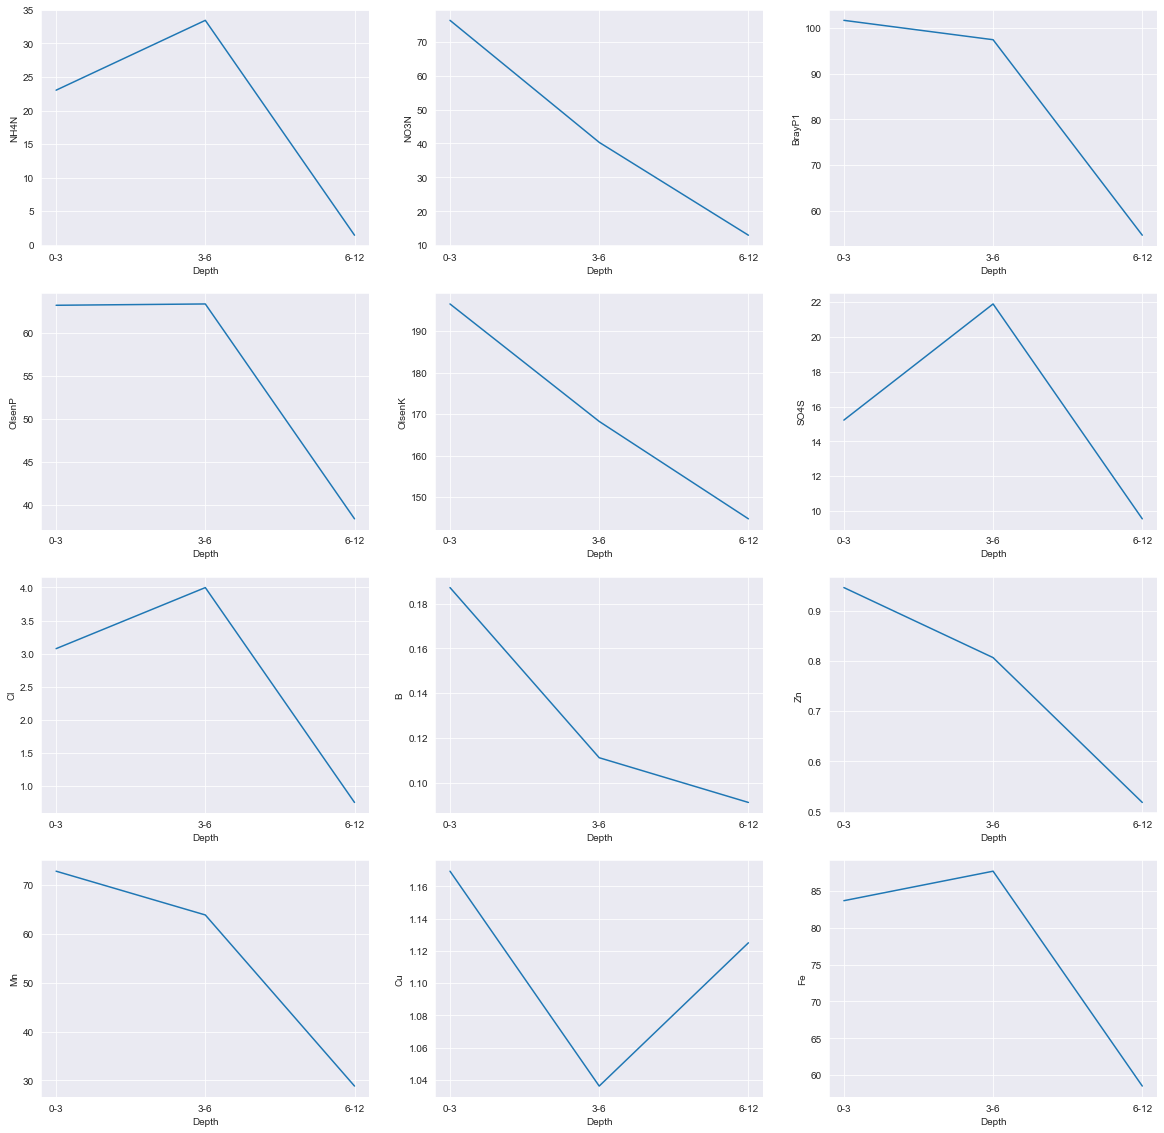

In [51]:
 f , axes = plt.subplots(nrows=4, ncols=3, figsize = (20,20))
f1=sns.lineplot(x='Depth',y='NH4N',data=df, ax=axes[0,0],ci=None)
f2=sns.lineplot(x='Depth',y='NO3N',data=df,ax=axes[0,1],ci=None)
f3=sns.lineplot(x='Depth',y='BrayP1',data=df,ax=axes[0,2],ci=None)
f4=sns.lineplot(x='Depth',y='OlsenP', data=df,ax=axes[1,0],ci=None)
f5=sns.lineplot(x='Depth',y='OlsenK',data=df, ax=axes[1,1],ci=None)
f6=sns.lineplot(x='Depth',y='SO4S',data=df,ax=axes[1,2],ci=None)
f7=sns.lineplot(x='Depth',y='Cl',data=df,ax=axes[2,0],ci=None)
f8=sns.lineplot(x='Depth',y='B',data=df,ax=axes[2,1],ci=None)
f9=sns.lineplot(x='Depth',y='Zn',data=df,ax=axes[2,2],ci=None)
f7=sns.lineplot(x='Depth',y='Mn',data=df,ax=axes[3,0],ci=None)
f8=sns.lineplot(x='Depth',y='Cu',data=df,ax=axes[3,1],ci=None)
f9=sns.lineplot(x='Depth',y='Fe',data=df,ax=axes[3,2],ci=None)
 
plt.show()

**ANSWER**

**We can see that p = .0000 (i.e., the Wilks' Lambda in Depth) Indicates that Depth significantly affects the combined DV (Cl,	B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg), which means that there is a statistically significant effect in chemical proprties of Depth . This means that the effect of the Depth on the dependent variables is not the same for Cl,	B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg .**

**Affect of Interaction of Treatment and Depth on Combine Soil chemical Properties?**

We can see that p = .246 (i.e., the Wilks' Lambda in interaction) Indicates that Interaction does not significantly affects the combined DV (Cl, B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg), which means that there is not statistically significant effect in chemical proprties of Interaction . This means that the effect of the Interaction on the dependent variables is not the same for Cl, B,Zn,Mn,Cu,Fe,Na,K,Ca,Mg .

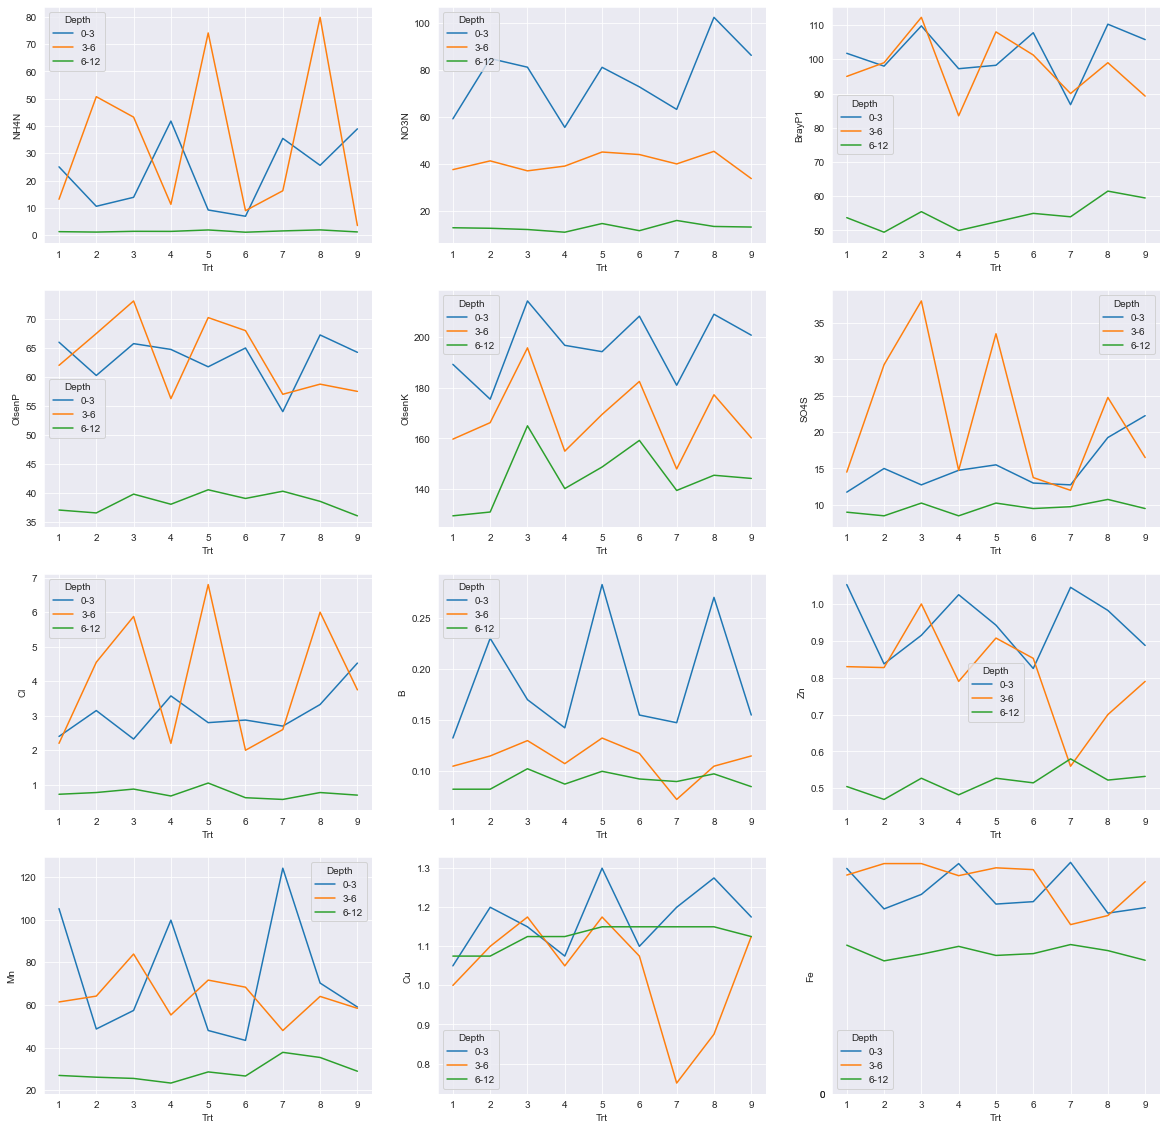

In [55]:
 sns.set_palette('tab10')  
f , axes = plt.subplots(nrows=4, ncols=3, figsize = (20,20))
sns.set_style("darkgrid")
 f1=sns.lineplot(x='Trt',y='NH4N',hue='Depth',data=df, ax=axes[0,0],ci=None)
f2=sns.lineplot(x='Trt',y='NO3N',hue='Depth',data=df,ax=axes[0,1],ci=None)
f3=sns.lineplot(x='Trt',y='BrayP1',hue='Depth',data=df,ax=axes[0,2],ci=None)
f4=sns.lineplot(x='Trt',y='OlsenP',hue='Depth',data=df,ax=axes[1,0],ci=None)
f5=sns.lineplot(x='Trt',y='OlsenK',hue='Depth',data=df, ax=axes[1,1],ci=None)
f6=sns.lineplot(x='Trt',y='SO4S',hue='Depth',data=df,ax=axes[1,2],ci=None)
f7=sns.lineplot(x='Trt',y='Cl',hue='Depth',data=df,ax=axes[2,0],ci=None)
f8=sns.lineplot(x='Trt',y='B',hue='Depth',data=df,ax=axes[2,1],ci=None)
f9=sns.lineplot(x='Trt',y='Zn',hue='Depth',data=df,ax=axes[2,2],ci=None)
f7=sns.lineplot(x='Trt',y='Mn',hue='Depth',data=df,ax=axes[3,0],ci=None)
f8=sns.lineplot(x='Trt',y='Cu',hue='Depth',data=df,ax=axes[3,1],ci=None)
f9=sns.lineplot(x='Trt',y='Fe',hue='Depth',data=df,ax=axes[3,2],ci=None)
plt.yticks([0,0])
plt.show()

# Lets Disuss individually

# Nitrogen in Ammonium (NH4-N)

**TWO WAY ANOVA IN each Dependent variable**

In [67]:
formula= 'NH4N~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                     sum_sq    df       F  PR(>F)
C(Trt)            7293.8267   8.0  0.9327  0.4944
C(Depth)         19250.9372   2.0  9.8474  0.0001
C(Depth):C(Trt)  26159.8028  16.0  1.6727  0.0691
Residual         79174.8100  81.0     NaN     NaN


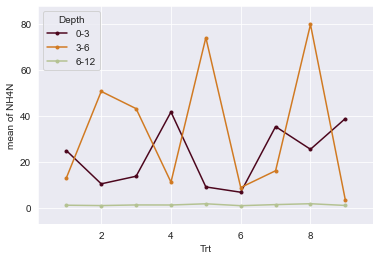

In [58]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df['NH4N'], 
    colors=['#4c061d','#d17a22', '#b4c292'])

plt.show()

**multiple comparision Between Depth**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0-3    3-6  10.4194 0.3711  -7.9331  28.772  False
   0-3   6-12 -21.6361 0.0165 -39.9887 -3.2836   True
   3-6   6-12 -32.0556 0.0002 -50.4081 -13.703   True
-----------------------------------------------------


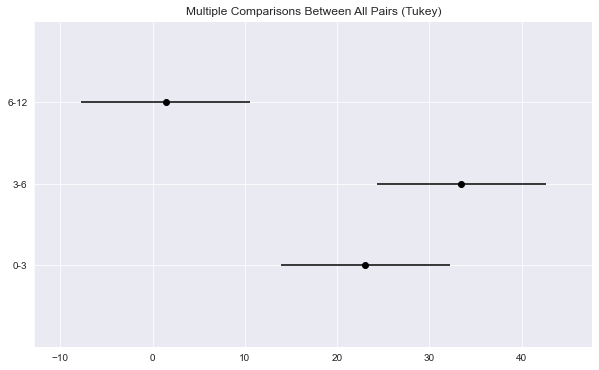

In [74]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['NH4N'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())


**multiple comparision between Treatment of chlorine**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   7.6667 0.9998 -38.2644 53.5977  False
     1      3   6.3583    1.0 -39.5727 52.2894  False
     1      4   5.0083    1.0 -40.9227 50.9394  False
     1      5  15.2667 0.9792 -30.6644 61.1977  False
     1      6     -7.5 0.9999  -53.431  38.431  False
     1      7   4.6083    1.0 -41.3227 50.5394  False
     1      8  22.6417 0.8219 -23.2894 68.5727  False
     1      9      1.4    1.0  -44.531  47.331  False
     2      3  -1.3083    1.0 -47.2394 44.6227  False
     2      4  -2.6583    1.0 -48.5894 43.2727  False
     2      5      7.6 0.9998  -38.331  53.531  False
     2      6 -15.1667   0.98 -61.0977 30.7644  False
     2      7  -3.0583    1.0 -48.9894 42.8727  False
     2      8   14.975 0.9816  -30.956  60.906  False
     2      9  -6.2667    1.0 -52.1977 39.6644  False
     3      4    -1.35    1.

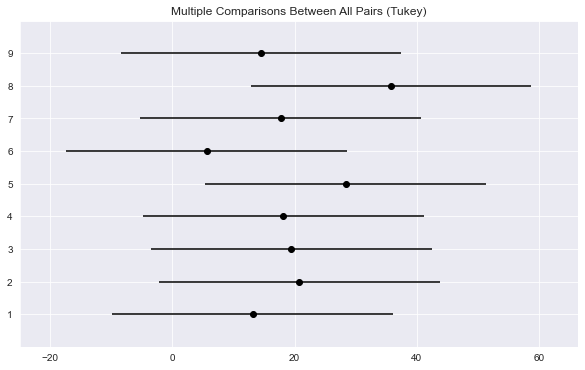

In [75]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['NH4N'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 1_0-3  1_3-6    -11.9    1.0  -96.5747  72.7747  False
 1_0-3 1_6-12  -23.775    1.0 -108.4497  60.8997  False
 1_0-3  2_0-3  -14.475    1.0  -99.1497  70.1997  False
 1_0-3  2_3-6   25.725    1.0  -58.9497 110.3997  False
 1_0-3 2_6-12  -23.925    1.0 -108.5997  60.7497  False
 1_0-3  3_0-3  -11.175    1.0  -95.8497  73.4997  False
 1_0-3  3_3-6   18.225    1.0  -66.4497 102.8997  False
 1_0-3 3_6-12   -23.65    1.0 -108.3247  61.0247  False
 1_0-3  4_0-3   16.775    1.0  -67.8997 101.4497  False
 1_0-3  4_3-6   -13.75    1.0  -98.4247  70.9247  False
 1_0-3 4_6-12  -23.675    1.0 -108.3497  60.9997  False
 1_0-3  5_0-3  -15.825    1.0 -100.4997  68.8497  False
 1_0-3  5_3-6     49.1 0.8846  -35.5747 133.7747  False
 1_0-3 5_6-12   -23.15    1.0 -107.8247  61.5247  False
 1_0-3  6_0-3  -18.125    1.0 -102.7997  66.5497

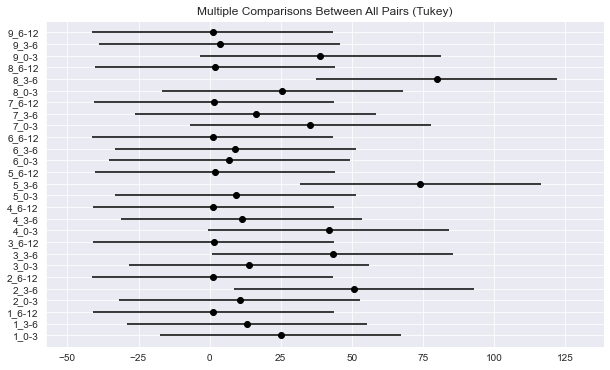

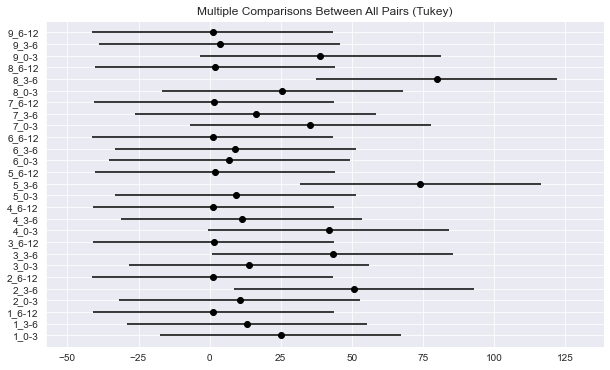

In [76]:
 df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['NH4N'],
 groups=df['combine'],
 alpha=0.05)
 print(tukey.summary())
tukey.plot_simultaneous()

# Bray(P1)

In [70]:
formula= 'BrayP1~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                     sum_sq    df        F  PR(>F)
C(Trt)            2806.4074   8.0   0.9361  0.4917
C(Depth)         48955.1296   2.0  65.3165  0.0000
C(Depth):C(Trt)   2225.5370  16.0   0.3712  0.9856
Residual         30355.0000  81.0      NaN     NaN


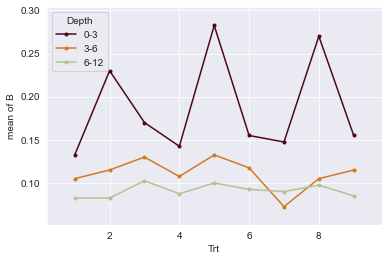

In [165]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['B'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

**multiple comparision Between Depth**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   0-3    3-6    -4.25 0.5897 -14.5371   6.0371  False
   0-3   6-12 -47.1389    0.0  -57.426 -36.8518   True
   3-6   6-12 -42.8889    0.0  -53.176 -32.6018   True
------------------------------------------------------


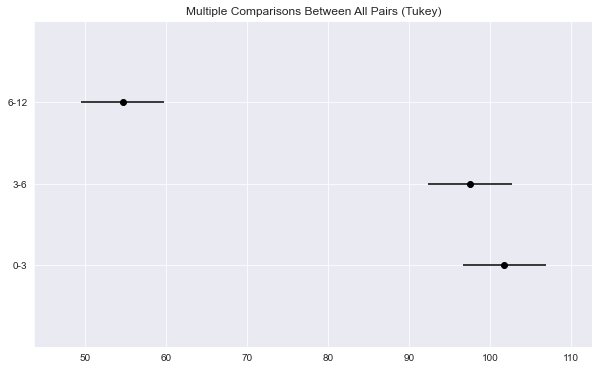

In [71]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['BrayP1'],
groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())


**multiple comparision between Treatment of Bray P1**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -1.3333    1.0 -38.4908 35.8242  False
     1      3      9.0 0.9975 -28.1575 46.1575  False
     1      4  -6.5833 0.9997 -43.7408 30.5742  False
     1      5     2.75    1.0 -34.4075 39.9075  False
     1      6      4.5    1.0 -32.6575 41.6575  False
     1      7  -6.5833 0.9997 -43.7408 30.5742  False
     1      8     6.75 0.9997 -30.4075 43.9075  False
     1      9   1.3333    1.0 -35.8242 38.4908  False
     2      3  10.3333 0.9935 -26.8242 47.4908  False
     2      4    -5.25    1.0 -42.4075 31.9075  False
     2      5   4.0833    1.0 -33.0742 41.2408  False
     2      6   5.8333 0.9999 -31.3242 42.9908  False
     2      7    -5.25    1.0 -42.4075 31.9075  False
     2      8   8.0833 0.9988 -29.0742 45.2408  False
     2      9   2.6667    1.0 -34.4908 39.8242  False
     3      4 -15.5833 0.919

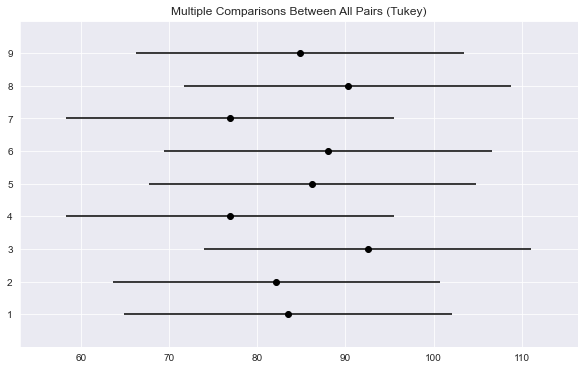

In [72]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['BrayP1'],
groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Interaction multiple comparision**

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 1_0-3  1_3-6    -6.75    1.0  -59.1795  45.6795  False
 1_0-3 1_6-12    -48.0 0.1206 -100.4295   4.4295  False
 1_0-3  2_0-3    -3.75    1.0  -56.1795  48.6795  False
 1_0-3  2_3-6    -2.75    1.0  -55.1795  49.6795  False
 1_0-3 2_6-12   -52.25 0.0519 -104.6795   0.1795  False
 1_0-3  3_0-3      8.0    1.0  -44.4295  60.4295  False
 1_0-3  3_3-6     10.5    1.0  -41.9295  62.9295  False
 1_0-3 3_6-12   -46.25 0.1649  -98.6795   6.1795  False
 1_0-3  4_0-3     -4.5    1.0  -56.9295  47.9295  False
 1_0-3  4_3-6   -18.25 0.9999  -70.6795  34.1795  False
 1_0-3 4_6-12   -51.75 0.0577 -104.1795   0.6795  False
 1_0-3  5_0-3     -3.5    1.0  -55.9295  48.9295  False
 1_0-3  5_3-6     6.25    1.0  -46.1795  58.6795  False
 1_0-3 5_6-12   -49.25 0.0952 -101.6795   3.1795  False
 1_0-3  6_0-3      6.0    1.0  -46.4295  58.4295

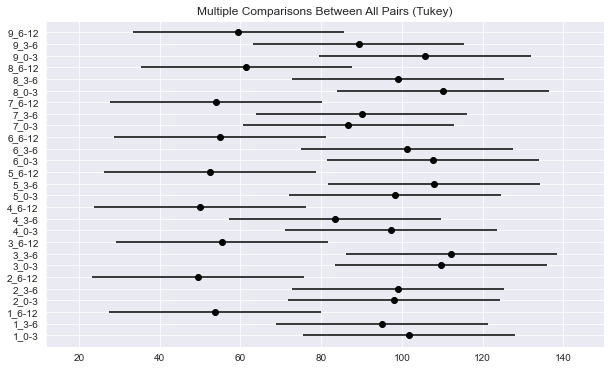

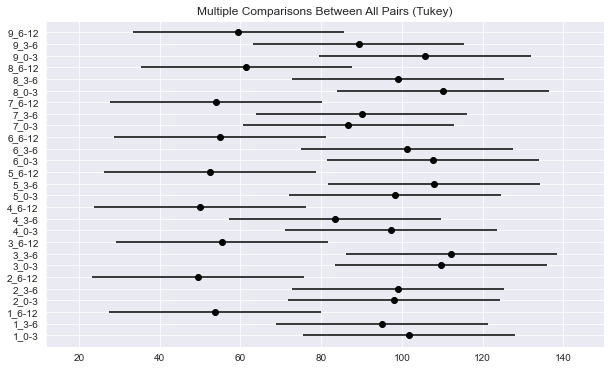

In [73]:
df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['BrayP1'],groups=df['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# ZINC(ZN)

**ANOVA Table For ZN**

In [77]:
formula= 'Zn~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=3)
print(aov_table.round(4))

                 sum_sq    df         F  PR(>F)
Intercept        4.4310   1.0  174.1472  0.0000
C(Trt)           0.2381   8.0    1.1697  0.3276
C(Depth)         0.6065   2.0   11.9186  0.0000
C(Depth):C(Trt)  0.6368  16.0    1.5643  0.0981
Residual         2.0610  81.0       NaN     NaN


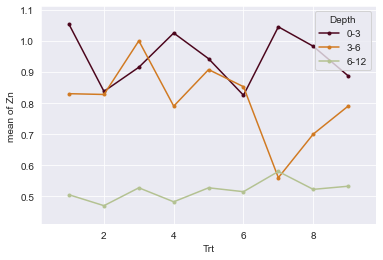

In [78]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['Zn'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

**Multiple comparision between Depth**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -0.1394 0.0014 -0.2314 -0.0475   True
   0-3   6-12  -0.4278    0.0 -0.5197 -0.3359   True
   3-6   6-12  -0.2883    0.0 -0.3802 -0.1964   True
----------------------------------------------------


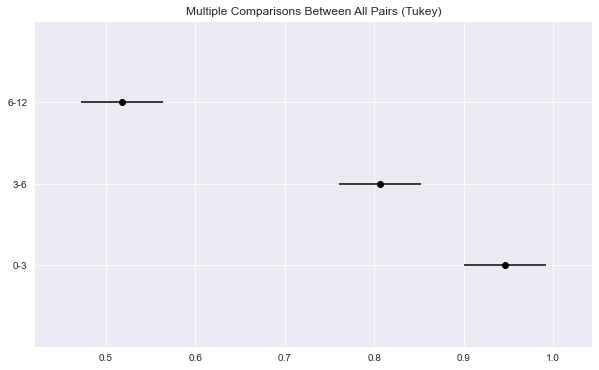

In [110]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Zn'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**multiple comparision Between Treatment**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0842 0.9957 -0.4062 0.2379  False
     1      3   0.0183    1.0 -0.3037 0.3404  False
     1      4    -0.03    1.0  -0.352  0.292  False
     1      5  -0.0033    1.0 -0.3254 0.3187  False
     1      6   -0.065 0.9993  -0.387  0.257  False
     1      7  -0.0675 0.9991 -0.3895 0.2545  False
     1      8  -0.0608 0.9996 -0.3829 0.2612  False
     1      9  -0.0592 0.9997 -0.3812 0.2629  False
     2      3   0.1025 0.9842 -0.2195 0.4245  False
     2      4   0.0542 0.9998 -0.2679 0.3762  False
     2      5   0.0808 0.9968 -0.2412 0.4029  False
     2      6   0.0192    1.0 -0.3029 0.3412  False
     2      7   0.0167    1.0 -0.3054 0.3387  False
     2      8   0.0233    1.0 -0.2987 0.3454  False
     2      9    0.025    1.0  -0.297  0.347  False
     3      4  -0.0483 0.9999 -0.3704 0.2737  False
     3      

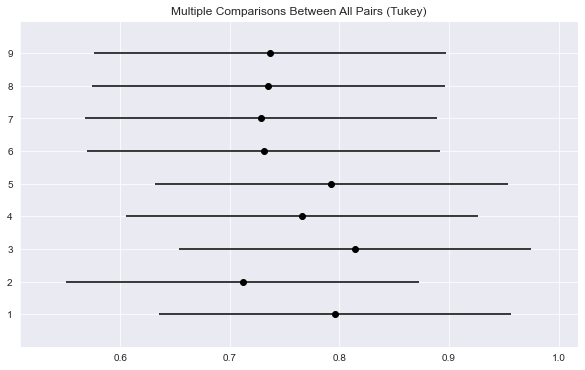

In [111]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Zn'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Multiple comparision betweeen Interation**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6  -0.2225 0.9631 -0.6545  0.2095  False
 1_0-3 1_6-12  -0.5475 0.0016 -0.9795 -0.1155   True
 1_0-3  2_0-3   -0.215 0.9748  -0.647   0.217  False
 1_0-3  2_3-6   -0.225 0.9585  -0.657   0.207  False
 1_0-3 2_6-12  -0.5825 0.0005 -1.0145 -0.1505   True
 1_0-3  3_0-3  -0.1375    1.0 -0.5695  0.2945  False
 1_0-3  3_3-6  -0.0525    1.0 -0.4845  0.3795  False
 1_0-3 3_6-12   -0.525 0.0034  -0.957  -0.093   True
 1_0-3  4_0-3  -0.0275    1.0 -0.4595  0.4045  False
 1_0-3  4_3-6  -0.2625  0.832 -0.6945  0.1695  False
 1_0-3 4_6-12    -0.57 0.0008  -1.002  -0.138   True
 1_0-3  5_0-3    -0.11    1.0  -0.542   0.322  False
 1_0-3  5_3-6   -0.145 0.9999  -0.577   0.287  False
 1_0-3 5_6-12   -0.525 0.0034  -0.957  -0.093   True
 1_0-3  6_0-3  -0.2275 0.9534 -0.6595  0.2045  False
 1_0-3  6_3-6     -0.2 0.9895  -0.632   0.232 

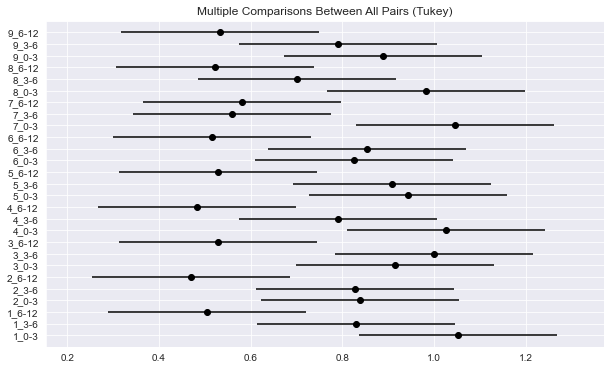

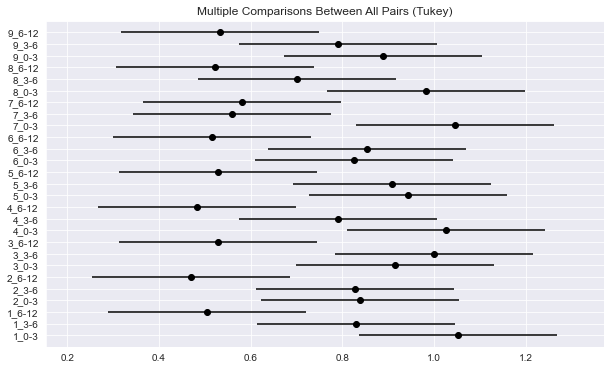

In [112]:
df1["combine"] = df1["Trt"].astype(str)+'_' + df1["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Zn'],groups=df1['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# Manganese | Mn

**ANOVA TABLE**

In [116]:
formula= 'Mn~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                     sum_sq    df        F  PR(>F)
C(Trt)            6724.3441   8.0   2.4675  0.0191
C(Depth)         39035.6080   2.0  57.2971  0.0000
C(Depth):C(Trt)  24959.7804  16.0   4.5795  0.0000
Residual         27591.9975  81.0      NaN     NaN


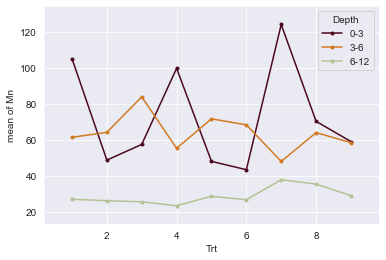

In [167]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['Mn'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

**Multiple comparision of Depth**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0-3    3-6   -8.975 0.2491 -22.2891  4.3391  False
   0-3   6-12 -44.0611    0.0 -57.3752 -30.747   True
   3-6   6-12 -35.0861    0.0 -48.4002 -21.772   True
-----------------------------------------------------


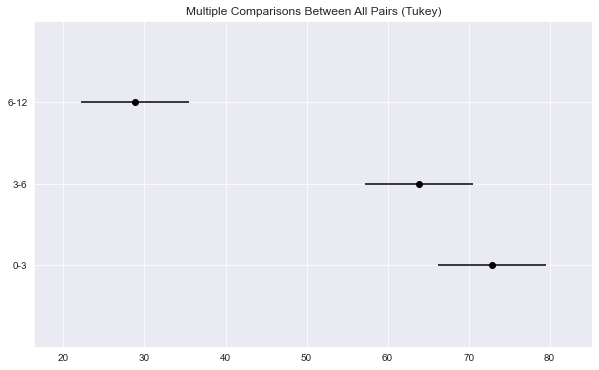

In [117]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Mn'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Multiple comparision of Treatment**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0842 0.9957 -0.4062 0.2379  False
     1      3   0.0183    1.0 -0.3037 0.3404  False
     1      4    -0.03    1.0  -0.352  0.292  False
     1      5  -0.0033    1.0 -0.3254 0.3187  False
     1      6   -0.065 0.9993  -0.387  0.257  False
     1      7  -0.0675 0.9991 -0.3895 0.2545  False
     1      8  -0.0608 0.9996 -0.3829 0.2612  False
     1      9  -0.0592 0.9997 -0.3812 0.2629  False
     2      3   0.1025 0.9842 -0.2195 0.4245  False
     2      4   0.0542 0.9998 -0.2679 0.3762  False
     2      5   0.0808 0.9968 -0.2412 0.4029  False
     2      6   0.0192    1.0 -0.3029 0.3412  False
     2      7   0.0167    1.0 -0.3054 0.3387  False
     2      8   0.0233    1.0 -0.2987 0.3454  False
     2      9    0.025    1.0  -0.297  0.347  False
     3      4  -0.0483 0.9999 -0.3704 0.2737  False
     3      

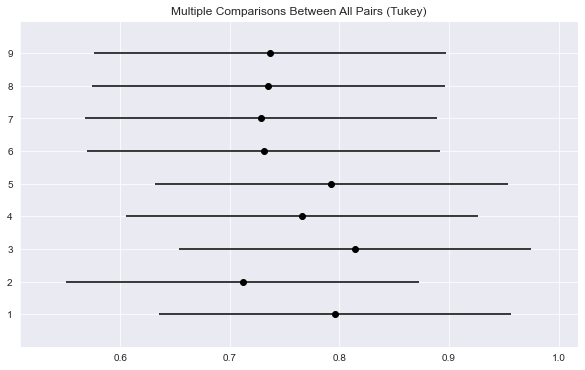

In [119]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Zn'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Multiple comparision Between Interaction**

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 1_0-3  1_3-6  -43.775 0.1747  -93.7614   6.2114  False
 1_0-3 1_6-12  -78.225    0.0 -128.2114 -28.2386   True
 1_0-3  2_0-3   -56.45 0.0106 -106.4364  -6.4636   True
 1_0-3  2_3-6  -41.025 0.2766  -91.0114   8.9614  False
 1_0-3 2_6-12   -79.05    0.0 -129.0364 -29.0636   True
 1_0-3  3_0-3   -47.75 0.0809  -97.7364   2.2364  False
 1_0-3  3_3-6    -21.3 0.9966  -71.2864  28.6864  False
 1_0-3 3_6-12  -79.625    0.0 -129.6114 -29.6386   True
 1_0-3  4_0-3   -5.425    1.0  -55.4114  44.5614  False
 1_0-3  4_3-6  -49.875 0.0513  -99.8614   0.1114  False
 1_0-3 4_6-12    -81.8    0.0 -131.7864 -31.8136   True
 1_0-3  5_0-3   -57.15 0.0088 -107.1364  -7.1636   True
 1_0-3  5_3-6  -33.525 0.6765  -83.5114  16.4614  False
 1_0-3 5_6-12  -76.575    0.0 -126.5614 -26.5886   True
 1_0-3  6_0-3    -61.8 0.0025 -111.7864 -11.8136

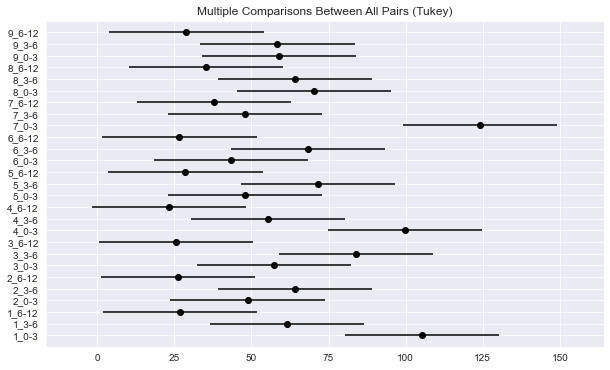

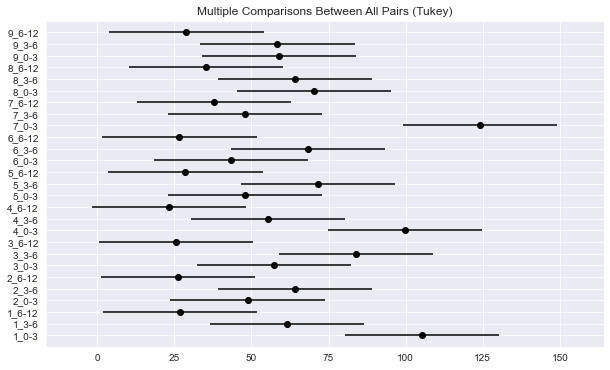

In [120]:
df1["combine"] = df1["Trt"].astype(str)+'_' + df1["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Mn'],groups=df1['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# Copper(Cu)

**ANOVA table**

In [125]:
formula= 'Cu~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=3)
print(aov_table.round(4))

                 sum_sq    df         F  PR(>F)
Intercept        4.4100   1.0  215.5113  0.0000
C(Trt)           0.2339   8.0    1.4287  0.1972
C(Depth)         0.0117   2.0    0.2851  0.7527
C(Depth):C(Trt)  0.6231  16.0    1.9033  0.0317
Residual         1.6575  81.0       NaN     NaN


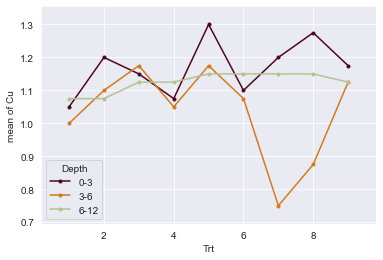

In [171]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['Cu'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

**multiple comparision of Depth**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -0.1333 0.0013 -0.2209 -0.0457   True
   0-3   6-12  -0.0444 0.4523 -0.1321  0.0432  False
   3-6   6-12   0.0889  0.046  0.0013  0.1765   True
----------------------------------------------------


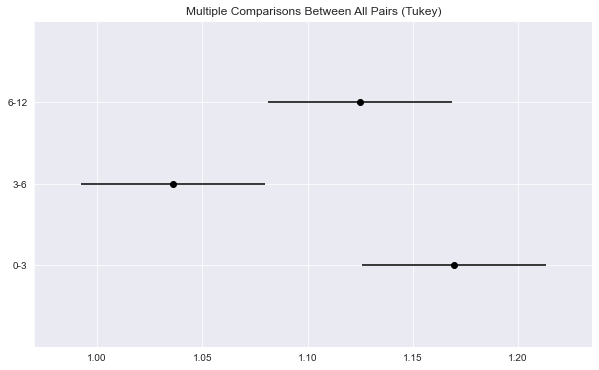

In [127]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Cu'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Multiple comparision of Treatment**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0833 0.9412  -0.127 0.2937  False
     1      3   0.1083  0.784  -0.102 0.3187  False
     1      4   0.0417 0.9994 -0.1687  0.252  False
     1      5   0.1667 0.2386 -0.0437  0.377  False
     1      6   0.0667 0.9846 -0.1437  0.277  False
     1      7  -0.0083    1.0 -0.2187  0.202  False
     1      8   0.0583 0.9936  -0.152 0.2687  False
     1      9      0.1 0.8493 -0.1103 0.3103  False
     2      3    0.025    1.0 -0.1853 0.2353  False
     2      4  -0.0417 0.9994  -0.252 0.1687  False
     2      5   0.0833 0.9412  -0.127 0.2937  False
     2      6  -0.0167    1.0  -0.227 0.1937  False
     2      7  -0.0917 0.9019  -0.302 0.1187  False
     2      8   -0.025    1.0 -0.2353 0.1853  False
     2      9   0.0167    1.0 -0.1937  0.227  False
     3      4  -0.0667 0.9846  -0.277 0.1437  False
     3      

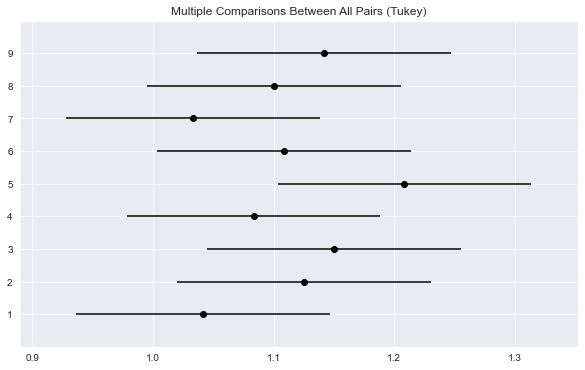

In [128]:
 tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Cu'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Interaction multiple comparision**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6    -0.05    1.0 -0.4374  0.3374  False
 1_0-3 1_6-12    0.025    1.0 -0.3624  0.4124  False
 1_0-3  2_0-3     0.15 0.9992 -0.2374  0.5374  False
 1_0-3  2_3-6     0.05    1.0 -0.3374  0.4374  False
 1_0-3 2_6-12    0.025    1.0 -0.3624  0.4124  False
 1_0-3  3_0-3      0.1    1.0 -0.2874  0.4874  False
 1_0-3  3_3-6    0.125    1.0 -0.2624  0.5124  False
 1_0-3 3_6-12    0.075    1.0 -0.3124  0.4624  False
 1_0-3  4_0-3    0.025    1.0 -0.3624  0.4124  False
 1_0-3  4_3-6      0.0    1.0 -0.3874  0.3874  False
 1_0-3 4_6-12    0.075    1.0 -0.3124  0.4624  False
 1_0-3  5_0-3     0.25  0.744 -0.1374  0.6374  False
 1_0-3  5_3-6    0.125    1.0 -0.2624  0.5124  False
 1_0-3 5_6-12      0.1    1.0 -0.2874  0.4874  False
 1_0-3  6_0-3     0.05    1.0 -0.3374  0.4374  False
 1_0-3  6_3-6    0.025    1.0 -0.3624  0.4124 

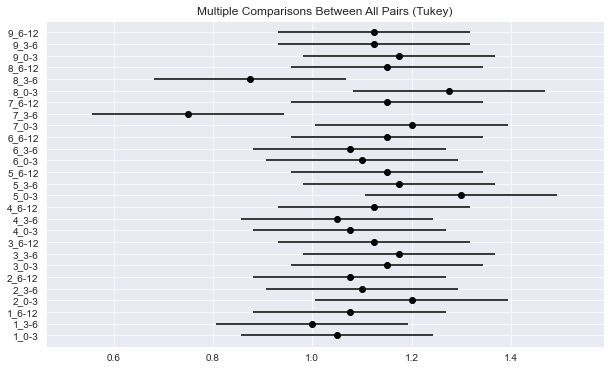

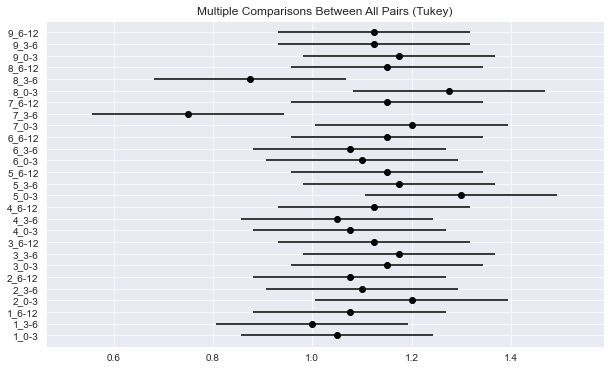

In [130]:
df1["combine"] = df1["Trt"].astype(str)+'_' + df1["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Cu'],groups=df1['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# IRON(FE)

In [138]:
formula= 'Fe~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                     sum_sq    df        F  PR(>F)
C(Trt)            1529.8519   8.0   1.2867  0.2621
C(Depth)         17964.4630   2.0  60.4374  0.0000
C(Depth):C(Trt)   3828.8704  16.0   1.6102  0.0847
Residual         12038.2500  81.0      NaN     NaN


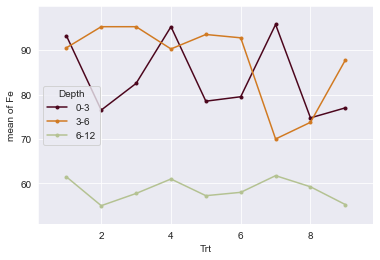

In [172]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['Fe'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

**Depth multiple comparision**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0-3    3-6      4.0 0.3882  -3.2129 11.2129  False
   0-3   6-12 -25.1389    0.0 -32.3518 -17.926   True
   3-6   6-12 -29.1389    0.0 -36.3518 -21.926   True
-----------------------------------------------------


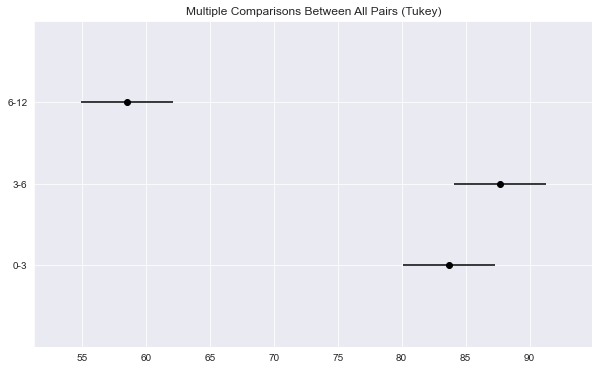

In [139]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Fe'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Treatment Multiple Comparision**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -6.1667 0.9961 -30.1017 17.7683  False
     1      3    -3.25    1.0  -27.185  20.685  False
     1      4   0.4167    1.0 -23.5183 24.3517  False
     1      5  -5.3333 0.9986 -29.2683 18.6017  False
     1      6     -5.0 0.9991  -28.935  18.935  False
     1      7  -5.9167 0.9971 -29.8517 18.0183  False
     1      8    -12.5  0.771  -36.435  11.435  False
     1      9  -8.4167 0.9706 -32.3517 15.5183  False
     2      3   2.9167    1.0 -21.0183 26.8517  False
     2      4   6.5833 0.9939 -17.3517 30.5183  False
     2      5   0.8333    1.0 -23.1017 24.7683  False
     2      6   1.1667    1.0 -22.7683 25.1017  False
     2      7     0.25    1.0  -23.685  24.185  False
     2      8  -6.3333 0.9953 -30.2683 17.6017  False
     2      9    -2.25    1.0  -26.185  21.685  False
     3      4   3.6667 0.999

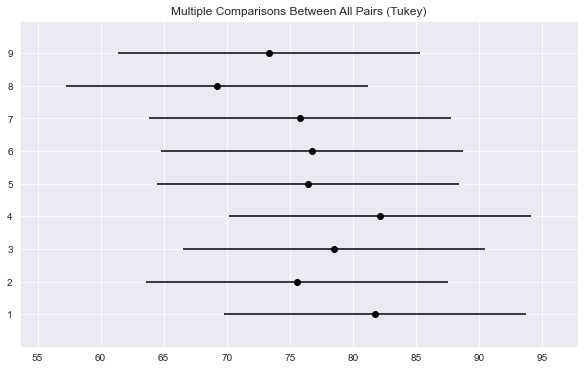

In [140]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Fe'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 1_0-3  1_3-6    -2.75    1.0 -35.7673 30.2673  False
 1_0-3 1_6-12   -31.75 0.0757 -64.7673  1.2673  False
 1_0-3  2_0-3   -16.75 0.9687 -49.7673 16.2673  False
 1_0-3  2_3-6      2.0    1.0 -31.0173 35.0173  False
 1_0-3 2_6-12   -38.25 0.0072 -71.2673 -5.2327   True
 1_0-3  3_0-3   -10.75    1.0 -43.7673 22.2673  False
 1_0-3  3_3-6      2.0    1.0 -31.0173 35.0173  False
 1_0-3 3_6-12    -35.5 0.0208 -68.5173 -2.4827   True
 1_0-3  4_0-3      2.0    1.0 -31.0173 35.0173  False
 1_0-3  4_3-6     -3.0    1.0 -36.0173 30.0173  False
 1_0-3 4_6-12   -32.25 0.0645 -65.2673  0.7673  False
 1_0-3  5_0-3   -14.75 0.9934 -47.7673 18.2673  False
 1_0-3  5_3-6     0.25    1.0 -32.7673 33.2673  False
 1_0-3 5_6-12    -36.0 0.0173 -69.0173 -2.9827   True
 1_0-3  6_0-3   -13.75 0.9975 -46.7673 19.2673  False
 1_0-3  6_3-6     -0.5    1.

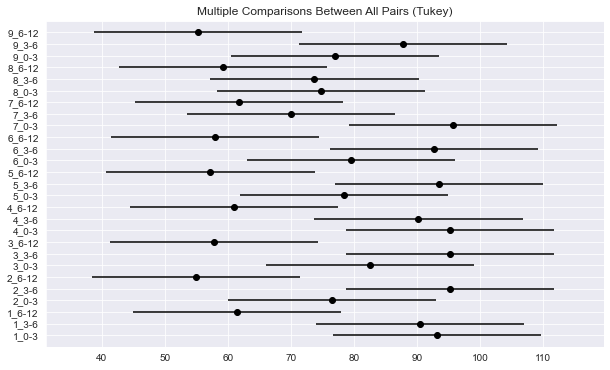

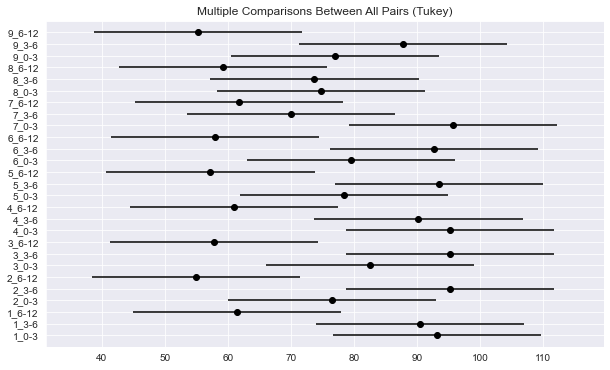

In [141]:
df1["combine"] = df1["Trt"].astype(str)+'_' + df1["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Fe'],groups=df1['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# chlorine(cl)

In [80]:
formula= 'Cl~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                   sum_sq    df        F  PR(>F)
C(Trt)            45.0833   8.0   1.4579  0.1857
C(Depth)         201.2356   2.0  26.0304  0.0000
C(Depth):C(Trt)   82.9861  16.0   1.3418  0.1932
Residual         313.0975  81.0      NaN     NaN


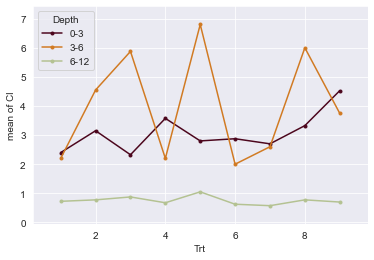

In [81]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['Cl'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -0.0136 0.0002 -0.0213 -0.0059   True
   0-3   6-12  -0.0042 0.4088 -0.0119  0.0036  False
   3-6   6-12   0.0094 0.0124  0.0017  0.0172   True
----------------------------------------------------


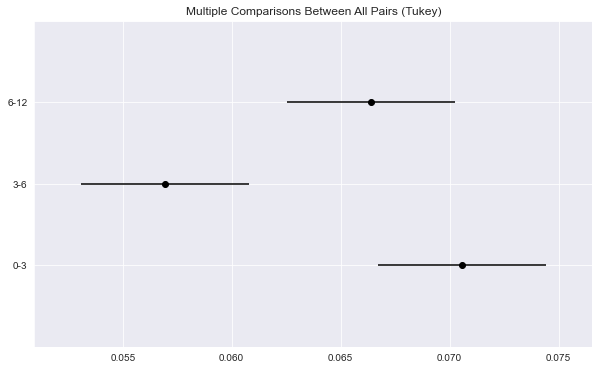

In [146]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Na'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     1.05   0.98 -2.1304 4.2304  False
     1      3     1.25 0.9438 -1.9304 4.4304  False
     1      4    0.375    1.0 -2.8054 3.5554  False
     1      5    1.775 0.7014 -1.4054 4.9554  False
     1      6   0.0583    1.0  -3.122 3.2387  False
     1      7   0.1833    1.0  -2.997 3.3637  False
     1      8   1.5917 0.8094 -1.5887  4.772  False
     1      9   1.2167 0.9518 -1.9637  4.397  False
     2      3      0.2    1.0 -2.9804 3.3804  False
     2      4   -0.675  0.999 -3.8554 2.5054  False
     2      5    0.725 0.9983 -2.4554 3.9054  False
     2      6  -0.9917 0.9861  -4.172 2.1887  False
     2      7  -0.8667 0.9943  -4.047 2.3137  False
     2      8   0.5417 0.9998 -2.6387  3.722  False
     2      9   0.1667    1.0 -3.0137  3.347  False
     3      4   -0.875 0.9939 -4.0554 2.3054  False
     3      

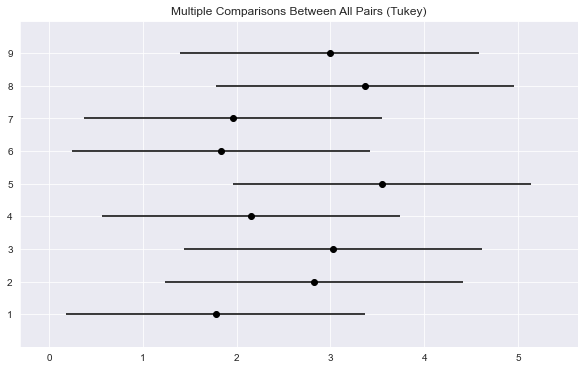

In [82]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Cl'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 1_0-3  1_3-6     -0.2    1.0  -5.5248  5.1248  False
 1_0-3 1_6-12   -1.675    1.0  -6.9998  3.6498  False
 1_0-3  2_0-3     0.75    1.0  -4.5748  6.0748  False
 1_0-3  2_3-6     2.15 0.9984  -3.1748  7.4748  False
 1_0-3 2_6-12   -1.625    1.0  -6.9498  3.6998  False
 1_0-3  3_0-3   -0.075    1.0  -5.3998  5.2498  False
 1_0-3  3_3-6    3.475 0.7251  -1.8498  8.7998  False
 1_0-3 3_6-12   -1.525    1.0  -6.8498  3.7998  False
 1_0-3  4_0-3    1.175    1.0  -4.1498  6.4998  False
 1_0-3  4_3-6     -0.2    1.0  -5.5248  5.1248  False
 1_0-3 4_6-12   -1.725    1.0  -7.0498  3.5998  False
 1_0-3  5_0-3      0.4    1.0  -4.9248  5.7248  False
 1_0-3  5_3-6      4.4 0.2647  -0.9248  9.7248  False
 1_0-3 5_6-12    -1.35    1.0  -6.6748  3.9748  False
 1_0-3  6_0-3    0.475    1.0  -4.8498  5.7998  False
 1_0-3  6_3-6     -0.4    1.

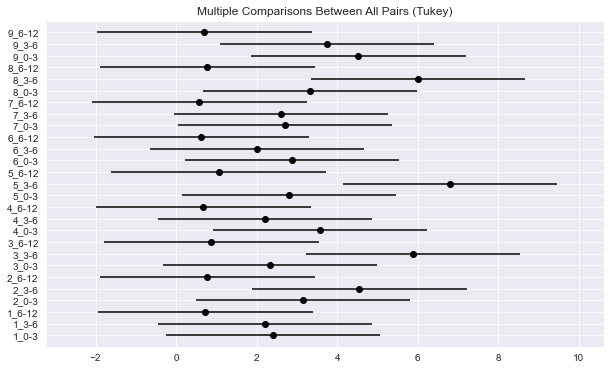

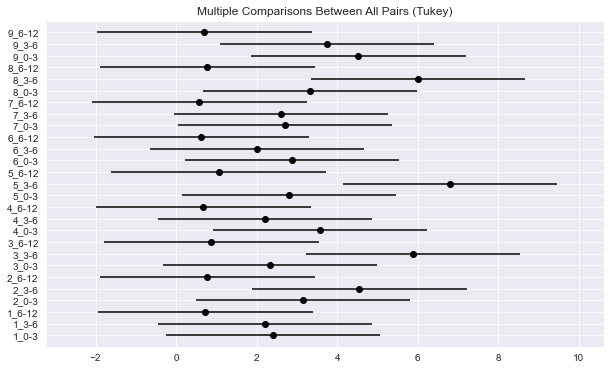

In [84]:
df1["combine"] = df1["Trt"].astype(str)+'_' + df1["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Cl'],groups=df1['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# Boron/ B


In [91]:
formula= 'B~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                 sum_sq    df         F  PR(>F)
C(Trt)           0.0532   8.0    9.3266     0.0
C(Depth)         0.1852   2.0  129.8545     0.0
C(Depth):C(Trt)  0.0653  16.0    5.7232     0.0
Residual         0.0578  81.0       NaN     NaN


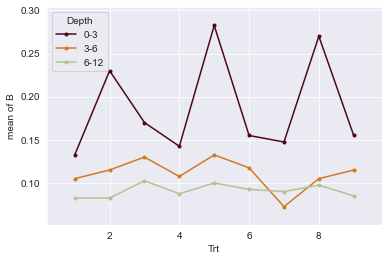

In [90]:
fig = interaction_plot(x=df1['Trt'], trace=df1['Depth'], response=df1['B'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -0.0761    0.0 -0.0991 -0.0532   True
   0-3   6-12  -0.0961    0.0 -0.1191 -0.0732   True
   3-6   6-12    -0.02 0.1008  -0.043   0.003  False
----------------------------------------------------


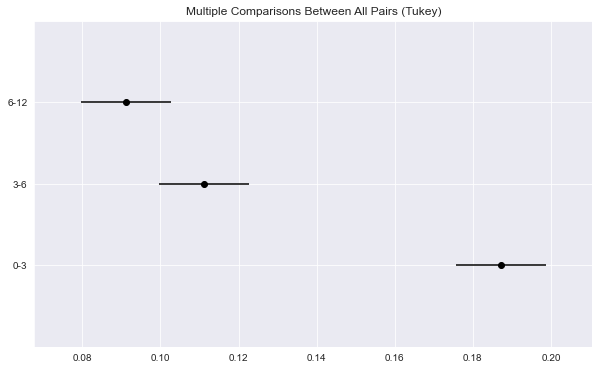

In [86]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['B'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0358 0.8169 -0.0364 0.1081  False
     1      3   0.0275 0.9531 -0.0447 0.0997  False
     1      4   0.0058    1.0 -0.0664 0.0781  False
     1      5    0.065 0.1133 -0.0072 0.1372  False
     1      6    0.015 0.9992 -0.0572 0.0872  False
     1      7  -0.0033    1.0 -0.0756 0.0689  False
     1      8   0.0508 0.3939 -0.0214 0.1231  False
     1      9   0.0117 0.9999 -0.0606 0.0839  False
     2      3  -0.0083    1.0 -0.0806 0.0639  False
     2      4    -0.03 0.9239 -0.1022 0.0422  False
     2      5   0.0292 0.9347 -0.0431 0.1014  False
     2      6  -0.0208 0.9917 -0.0931 0.0514  False
     2      7  -0.0392 0.7332 -0.1114 0.0331  False
     2      8    0.015 0.9992 -0.0572 0.0872  False
     2      9  -0.0242 0.9783 -0.0964 0.0481  False
     3      4  -0.0217 0.9892 -0.0939 0.0506  False
     3      

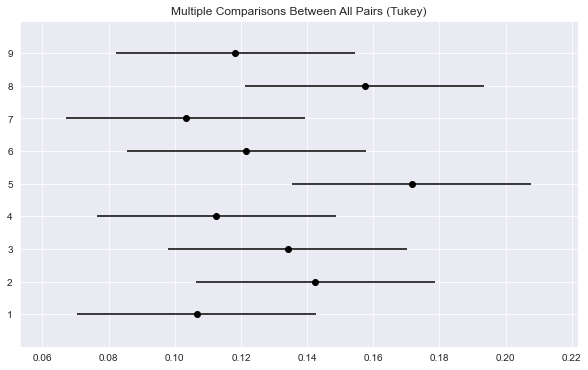

In [87]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['B'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6  -0.0275 0.9994 -0.0998  0.0448  False
 1_0-3 1_6-12    -0.05 0.6184 -0.1223  0.0223  False
 1_0-3  2_0-3   0.0975 0.0005  0.0252  0.1698   True
 1_0-3  2_3-6  -0.0175    1.0 -0.0898  0.0548  False
 1_0-3 2_6-12    -0.05 0.6184 -0.1223  0.0223  False
 1_0-3  3_0-3   0.0375 0.9604 -0.0348  0.1098  False
 1_0-3  3_3-6  -0.0025    1.0 -0.0748  0.0698  False
 1_0-3 3_6-12    -0.03 0.9977 -0.1023  0.0423  False
 1_0-3  4_0-3     0.01    1.0 -0.0623  0.0823  False
 1_0-3  4_3-6   -0.025 0.9999 -0.0973  0.0473  False
 1_0-3 4_6-12   -0.045 0.7999 -0.1173  0.0273  False
 1_0-3  5_0-3     0.15    0.0  0.0777  0.2223   True
 1_0-3  5_3-6      0.0    1.0 -0.0723  0.0723  False
 1_0-3 5_6-12  -0.0325 0.9929 -0.1048  0.0398  False
 1_0-3  6_0-3   0.0225    1.0 -0.0498  0.0948  False
 1_0-3  6_3-6   -0.015    1.0 -0.0873  0.0573 

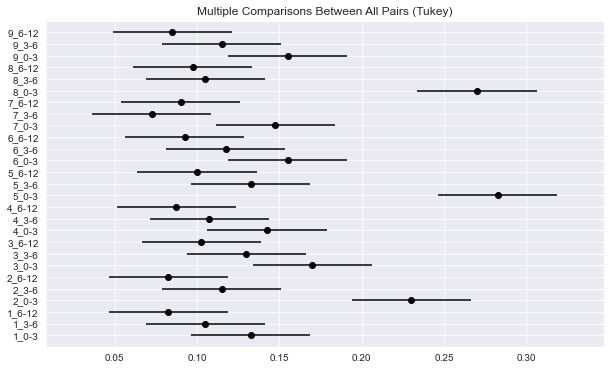

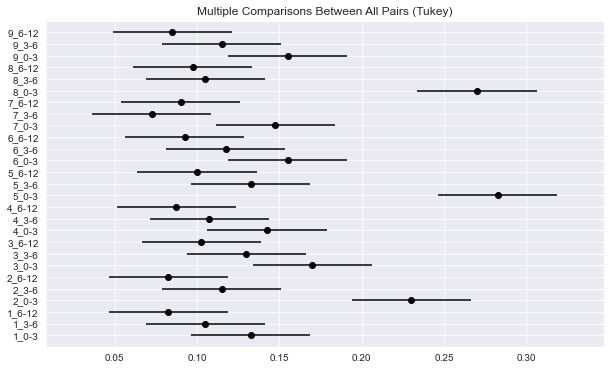

In [89]:
df1["combine"] = df1["Trt"].astype(str)+'_' + df1["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['B'],groups=df1['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# SO4S

In [96]:
formula= 'SO4S~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print(aov_table.round(4))

                    sum_sq    df        F  PR(>F)
C(Trt)           1240.8333   8.0   1.7993  0.0891
C(Depth)         2744.0000   2.0  15.9158  0.0000
C(Depth):C(Trt)  2181.3333  16.0   1.5815  0.0929
Residual         6982.5000  81.0      NaN     NaN


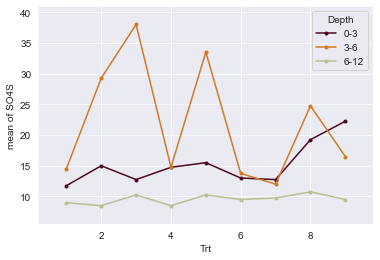

In [93]:
fig = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SO4S'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0-3    3-6   6.6667 0.0148   1.0886 12.2448   True
   0-3   6-12  -5.6667 0.0456 -11.2448 -0.0886   True
   3-6   6-12 -12.3333    0.0 -17.9114 -6.7552   True
-----------------------------------------------------


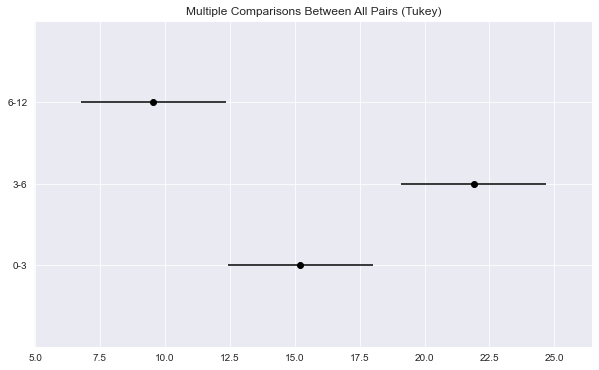

In [94]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['SO4S'],
groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.1667 0.7953 -1.1268 3.4601  False
     1      3   1.4833 0.5122 -0.8101 3.7768  False
     1      4    0.425 0.9996 -1.8685 2.7185  False
     1      5      1.4 0.5909 -0.8935 3.6935  False
     1      6    1.625 0.3843 -0.6685 3.9185  False
     1      7   0.1917    1.0 -2.1018 2.4851  False
     1      8   1.5167 0.4811 -0.7768 3.8101  False
     1      9   1.7083 0.3163 -0.5851 4.0018  False
     2      3   0.3167    1.0 -1.9768 2.6101  False
     2      4  -0.7417 0.9825 -3.0351 1.5518  False
     2      5   0.2333    1.0 -2.0601 2.5268  False
     2      6   0.4583 0.9994 -1.8351 2.7518  False
     2      7   -0.975 0.9138 -3.2685 1.3185  False
     2      8     0.35 0.9999 -1.9435 2.6435  False
     2      9   0.5417 0.9979 -1.7518 2.8351  False
     3      4  -1.0583 0.8694 -3.3518 1.2351  False
     3      

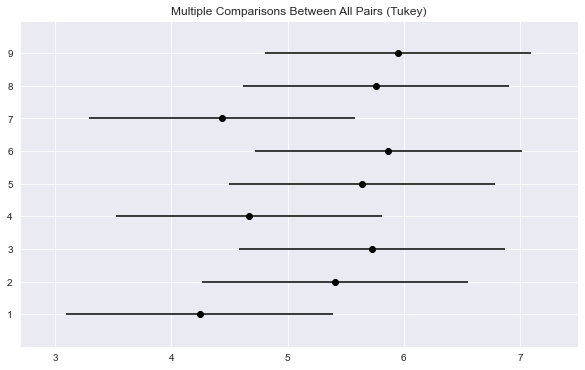

In [157]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Ca'],
groups=df1['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 1_0-3  1_3-6     2.75    1.0 -22.3958 27.8958  False
 1_0-3 1_6-12    -2.75    1.0 -27.8958 22.3958  False
 1_0-3  2_0-3     3.25    1.0 -21.8958 28.3958  False
 1_0-3  2_3-6     17.5 0.6054  -7.6458 42.6458  False
 1_0-3 2_6-12    -3.25    1.0 -28.3958 21.8958  False
 1_0-3  3_0-3      1.0    1.0 -24.1458 26.1458  False
 1_0-3  3_3-6    26.25 0.0303   1.1042 51.3958   True
 1_0-3 3_6-12     -1.5    1.0 -26.6458 23.6458  False
 1_0-3  4_0-3      3.0    1.0 -22.1458 28.1458  False
 1_0-3  4_3-6      3.0    1.0 -22.1458 28.1458  False
 1_0-3 4_6-12    -3.25    1.0 -28.3958 21.8958  False
 1_0-3  5_0-3     3.75    1.0 -21.3958 28.8958  False
 1_0-3  5_3-6    21.75 0.1921  -3.3958 46.8958  False
 1_0-3 5_6-12     -1.5    1.0 -26.6458 23.6458  False
 1_0-3  6_0-3     1.25    1.0 -23.8958 26.3958  False
 1_0-3  6_3-6      2.0    1.

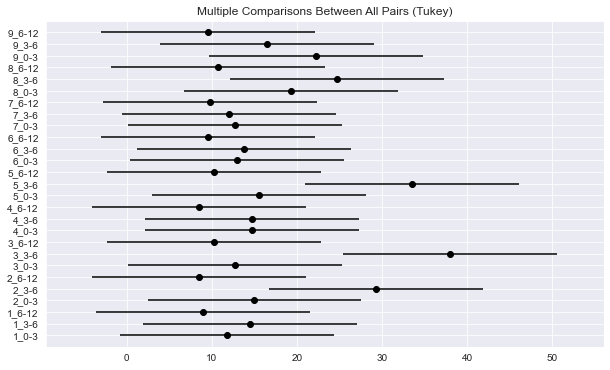

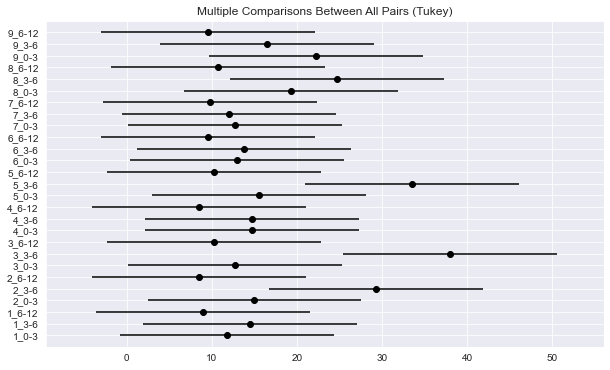

In [95]:
df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['SO4S'],groups=df['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# NO3-N

In [100]:
formula= 'NO3N~C(Trt)+C(Depth)+C(Depth):C(Trt)'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=3)
print(aov_table.round(4))

                     sum_sq    df        F  PR(>F)
Intercept        14018.5600   1.0  60.8106  0.0000
C(Trt)            7241.2839   8.0   3.9265  0.0006
C(Depth)          4317.0717   2.0   9.3634  0.0002
C(Depth):C(Trt)   4736.7300  16.0   1.2842  0.2276
Residual         18672.7825  81.0      NaN     NaN


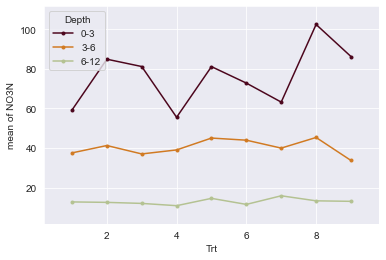

In [102]:
fig = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['NO3N'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0-3    3-6  -0.0833 0.1701 -0.1926 0.0259  False
   0-3   6-12    0.575    0.0  0.4658 0.6842   True
   3-6   6-12   0.6583    0.0  0.5491 0.7676   True
---------------------------------------------------


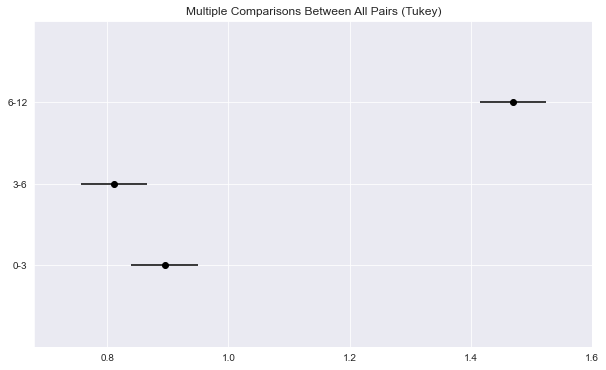

In [161]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df1['Mg'],
groups=df1['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   9.7333 0.9975 -30.6047 50.0713  False
     1      3   6.9083 0.9998 -33.4297 47.2463  False
     1      4    -1.35    1.0  -41.688  38.988  False
     1      5  10.4167  0.996 -29.9213 50.7547  False
     1      6   6.2667 0.9999 -34.0713 46.6047  False
     1      7   3.1833    1.0 -37.1547 43.5213  False
     1      8     17.2 0.9125  -23.138  57.538  False
     1      9   7.8417 0.9995 -32.4963 48.1797  False
     2      3   -2.825    1.0  -43.163  37.513  False
     2      4 -11.0833  0.994 -51.4213 29.2547  False
     2      5   0.6833    1.0 -39.6547 41.0213  False
     2      6  -3.4667    1.0 -43.8047 36.8713  False
     2      7    -6.55 0.9999  -46.888  33.788  False
     2      8   7.4667 0.9996 -32.8713 47.8047  False
     2      9  -1.8917    1.0 -42.2297 38.4463  False
     3      4  -8.2583 0.999

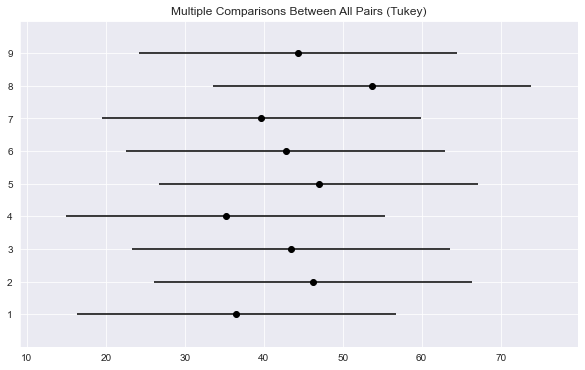

In [103]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['NO3N'],
groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 1_0-3  1_3-6   -21.65 0.9535  -62.7711  19.4711  False
 1_0-3 1_6-12  -46.425 0.0106  -87.5461  -5.3039   True
 1_0-3  2_0-3     25.7 0.7936  -15.4211  66.8211  False
 1_0-3  2_3-6  -17.925 0.9953  -59.0461  23.1961  False
 1_0-3 2_6-12   -46.65 0.0099  -87.7711  -5.5289   True
 1_0-3  3_0-3     22.0 0.9452  -19.1211  63.1211  False
 1_0-3  3_3-6  -22.175 0.9407  -63.2961  18.9461  False
 1_0-3 3_6-12  -47.175 0.0084  -88.2961  -6.0539   True
 1_0-3  4_0-3    -3.65    1.0  -44.7711  37.4711  False
 1_0-3  4_3-6   -20.15 0.9789  -61.2711  20.9711  False
 1_0-3 4_6-12  -48.325 0.0058  -89.4461  -7.2039   True
 1_0-3  5_0-3    21.95 0.9465  -19.1711  63.0711  False
 1_0-3  5_3-6   -14.15 0.9999  -55.2711  26.9711  False
 1_0-3 5_6-12  -44.625 0.0184  -85.7461  -3.5039   True
 1_0-3  6_0-3   13.625 0.9999  -27.4961  54.7461

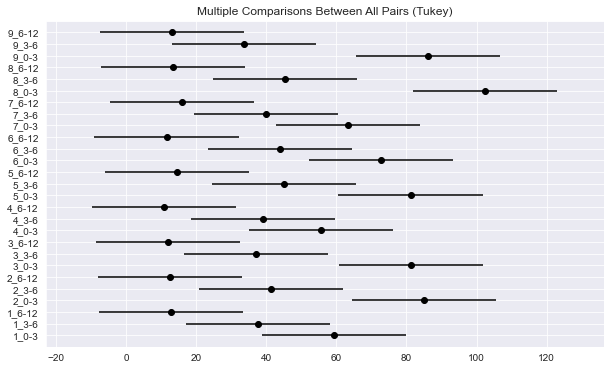

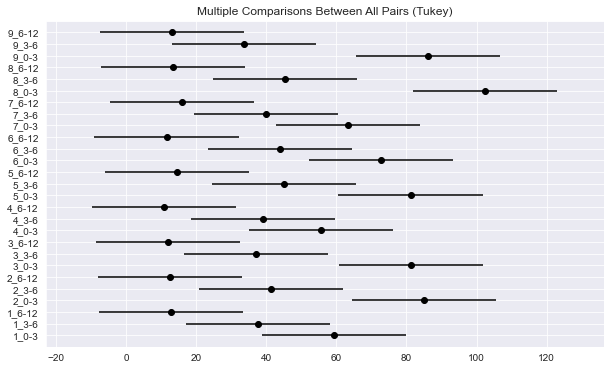

In [104]:
df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['NO3N'],groups=df['combine'],alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()